# **Klasifikasi (Imbalanced Data, 0.1 Split)**

# Load Data

In [2]:
import pandas as pd
df=pd.read_csv(r'500feature.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11106 entries, 0 to 11105
Columns: 504 entries, stemming to zonauang
dtypes: float64(500), int64(1), object(3)
memory usage: 42.7+ MB


# Label Encoder

In [4]:
df['label'] = df['label'].replace({'positive': 1, 'negative': 0})

C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\69039889.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'positive': 1, 'negative': 0})


In [5]:
df.head()

,stemming,label,total_weight,word_weights,aci,ada,admin,aduh,ah,air,...,varian,versi,voc,voucher,waktu,walaupun,wts,yuk,zonajajan,zonauang
0,lanjut janji_jiwa stay hungry tau,1,4,"[2, 0, 0, 0, 2]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,banyak engga suka janji_jiwa padahal favorit i...,1,19,"[3, 0, 3, 0, 0, 5, 0, 0, 0, 3, 0, 0, 0, 5, 0]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,kopi susu sahabat janji_jiwa gila enak banget ...,1,25,"[0, 0, 4, 0, 3, 5, 1, 0, 5, 1, 0, 3, 3]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,habis beberes kamar baru sadar nyata kumpul to...,1,10,"[3, 0, 0, 0, 2, 4, 0, 0, 0, 3, 1, -3]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,bjir wkwjwkk janji suci penting bukan janji_ji...,1,1,"[0, 0, 0, 4, 3, -3, 0, -3]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df = df.drop(columns=['stemming', 'total_weight', 'word_weights'])

In [7]:
df.head()

,label,aci,ada,admin,aduh,ah,air,ajak,ajar,akhir,...,varian,versi,voc,voucher,waktu,walaupun,wts,yuk,zonajajan,zonauang
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Missing Value?**

In [14]:
df.isna().sum()

label        0
aci          0
ada          0
admin        0
aduh         0
            ..
walaupun     0
wts          0
yuk          0
zonajajan    0
zonauang     0
Length: 501, dtype: int64

## **Oversampling**

In [17]:
dfb=df

In [19]:
X_train = dfb.drop('label', axis=1)
y_train = dfb['label']

In [21]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [22]:
dfb = pd.concat([X_train, y_train], axis=1)
dfb.label.value_counts()

label
1    8858
0    8858
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
# Bagi data ke train dan test set
train = dfb

X = train.drop(['label'], axis=1)
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split

# Misalnya, X adalah fitur dan y adalah target (kelas positif dan negatif)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Cek jumlah data positif dan negatif pada data latih
train_positive = (y_train == 1).sum()  # Anggap 1 adalah kelas positif
train_negative = (y_train == 0).sum()  # Anggap 0 adalah kelas negatif

# Cek jumlah data positif dan negatif pada data uji
test_positive = (y_test == 1).sum()
test_negative = (y_test == 0).sum()

# Tampilkan hasilnya
print(f"Jumlah data positif pada data latih: {train_positive}")
print(f"Jumlah data negatif pada data latih: {train_negative}")
print(f"Jumlah data positif pada data uji: {test_positive}")
print(f"Jumlah data negatif pada data uji: {test_negative}")


Jumlah data positif pada data latih: 7972
Jumlah data negatif pada data latih: 7972
Jumlah data positif pada data uji: 886
Jumlah data negatif pada data uji: 886


## Import Library

In [26]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier

# Siapkan base classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', penalty='l2', max_iter=200, C=10),
    'Decision Tree': DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=5, max_depth=None, criterion='gini'),
    'K-Nearest Neighbors': KNeighborsClassifier(weights='distance', p=2, n_neighbors=5, n_jobs=-1, metric='minkowski', leaf_size=50, algorithm='brute'),
    'Multinomial Naive Bayes': MultinomialNB(fit_prior=False, alpha=0.1)
}

## SKCV

In [28]:
# Cross-validation menggunakan StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# Evaluasi untuk setiap base classifier menggunakan cross-validation
for name, clf in classifiers.items():
    auc_scores = []
    print(f"\nEvaluating {name}")
    
    # Lakukan StratifiedKFold
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fit classifier pada data train cross-validation
        clf.fit(X_train_cv, y_train_cv)

        # Prediksi pada validation set dan hitung ROC-AUC
        y_val_pred_proba = clf.predict_proba(X_val_cv)[:, 1] if hasattr(clf, 'predict_proba') else clf.predict(X_val_cv)
        auc = roc_auc_score(y_val_cv, y_val_pred_proba)
        auc_scores.append(auc)

    print("AUC Scores for each fold:", auc_scores)
    print("Average AUC Score:", sum(auc_scores) / len(auc_scores))



Evaluating Logistic Regression
AUC Scores for each fold: [0.9625223661411999, 0.9684767124838446, 0.9692542208721301, 0.9646835092750697, 0.9611143733794703, 0.9564733812020926, 0.9642117791152205, 0.9626414298286076, 0.9665078737864231, 0.970423120579211]
Average AUC Score: 0.964630876666327

Evaluating Decision Tree
AUC Scores for each fold: [0.9261791555425578, 0.9228340613138871, 0.9294676465316365, 0.933249843554935, 0.9258141808444151, 0.9258063094194193, 0.9304756387267812, 0.9326575977355483, 0.940906063988388, 0.9345349325969878]
Average AUC Score: 0.9301925430254556

Evaluating K-Nearest Neighbors
AUC Scores for each fold: [0.9496577076316891, 0.9029828334952815, 0.9012910255563626, 0.9011400835841172, 0.9099871066058574, 0.9017126646505323, 0.8947661320919571, 0.9028067927249142, 0.9007035479661025, 0.9096281696260601]
Average AUC Score: 0.9074676063932874

Evaluating Multinomial Naive Bayes
AUC Scores for each fold: [0.9223026197866058, 0.9421153259560444, 0.92323893170819

## Classification Report

In [30]:
# Evaluasi akhir pada test set untuk tiap classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Fit pada seluruh training set
    y_test_pred = clf.predict(X_test)  # Prediksi pada test set

    print(f"\n{name} - Test Set Evaluation")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))  # Confusion Matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))  # Classification Report

    # ROC-AUC pada test set jika classifier memiliki `predict_proba`

    if hasattr(clf, 'predict_proba'):
        y_test_pred_proba = clf.predict_proba(X_test)[:, 1]
        print("ROC-AUC on Test Set:", roc_auc_score(y_test, y_test_pred_proba))



Logistic Regression - Test Set Evaluation
Confusion Matrix:
[[836  50]
 [ 93 793]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       886
           1       0.94      0.90      0.92       886

    accuracy                           0.92      1772
   macro avg       0.92      0.92      0.92      1772
weighted avg       0.92      0.92      0.92      1772

ROC-AUC on Test Set: 0.9707310610499926

Decision Tree - Test Set Evaluation
Confusion Matrix:
[[805  81]
 [122 764]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       886
           1       0.90      0.86      0.88       886

    accuracy                           0.89      1772
   macro avg       0.89      0.89      0.89      1772
weighted avg       0.89      0.89      0.89      1772

ROC-AUC on Test Set: 0.947406101432364

K-Nearest Neighbors - Test Set Evaluation
Confusion Matr

In [31]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Fit pada seluruh training set
    y_test_pred = clf.predict(X_test)  # Prediksi pada test set

    print(f"\n{name} - Test Set Evaluation")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))  # Confusion Matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, digits=4))  # Menampilkan presisi 4 desimal

    # ROC-AUC pada test set jika classifier memiliki `predict_proba`
    if hasattr(clf, 'predict_proba'):
        y_test_pred_proba = clf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_pred_proba)
        print(f"ROC-AUC on Test Set: {roc_auc:.4f}")  # Menampilkan ROC-AUC dengan 4 desimal



Logistic Regression - Test Set Evaluation
Confusion Matrix:
[[836  50]
 [ 93 793]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8999    0.9436    0.9212       886
           1     0.9407    0.8950    0.9173       886

    accuracy                         0.9193      1772
   macro avg     0.9203    0.9193    0.9193      1772
weighted avg     0.9203    0.9193    0.9193      1772

ROC-AUC on Test Set: 0.9707

Decision Tree - Test Set Evaluation
Confusion Matrix:
[[810  76]
 [120 766]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8710    0.9142    0.8921       886
           1     0.9097    0.8646    0.8866       886

    accuracy                         0.8894      1772
   macro avg     0.8904    0.8894    0.8893      1772
weighted avg     0.8904    0.8894    0.8893      1772

ROC-AUC on Test Set: 0.9506

K-Nearest Neighbors - Test Set Evaluation
Confusion Matrix:
[[880   6]
 [341 54

C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\2672215606.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  disp.plot(ax=axes[idx], cmap=plt.cm.get_cmap(cmap))  # Plot dengan colormap yang dipilih
C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\2672215606.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  disp.plot(ax=axes[idx], cmap=plt.cm.get_cmap(cmap))  # Plot dengan colormap yang dipilih
C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\2672215606.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormap

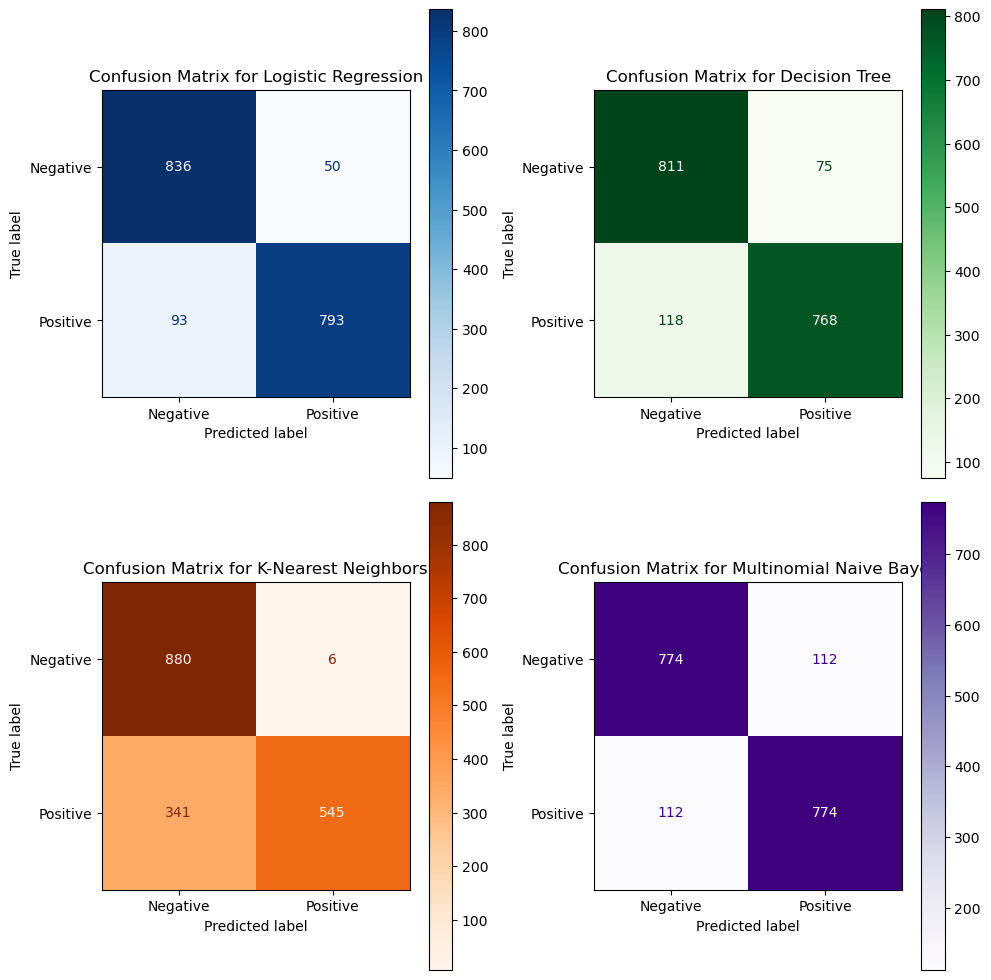

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Hitung jumlah kolom yang diperlukan
n_classifiers = len(classifiers)
n_cols = (n_classifiers + 1) // 2  # 2 baris
n_rows = 2

# Setup grid untuk visualisasi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 10))  # Atur ukuran subplot
axes = axes.flatten()  # Ubah menjadi array 1D untuk indexing yang mudah

# Warna berbeda untuk tiap model
cmap_choices = ['Blues', 'Greens', 'Oranges', 'Purples']

# Loop untuk setiap model
for idx, (name, model) in enumerate(classifiers.items()):
    # Latih model
    model.fit(X_train, y_train)
    # Prediksi pada data uji
    y_pred = model.predict(X_test)
    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix di subplot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    cmap = cmap_choices[idx % len(cmap_choices)]  # Pilih warna berdasarkan indeks
    disp.plot(ax=axes[idx], cmap=plt.cm.get_cmap(cmap))  # Plot dengan colormap yang dipilih
    axes[idx].set_title(f"Confusion Matrix for {name}")

# Hapus subplot kosong jika jumlah classifier kurang dari grid
for i in range(n_classifiers, len(axes)):
    fig.delaxes(axes[i])

# Sesuaikan tata letak
plt.tight_layout()
plt.show()


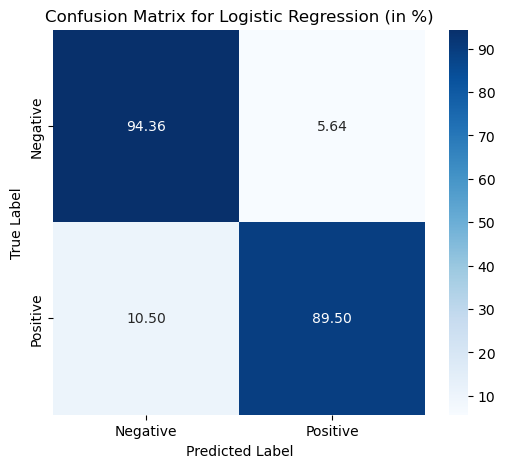

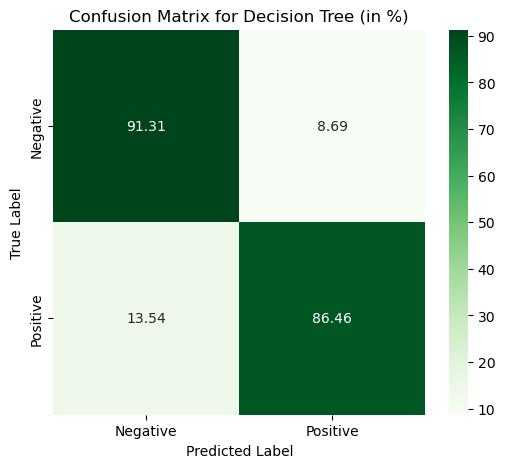

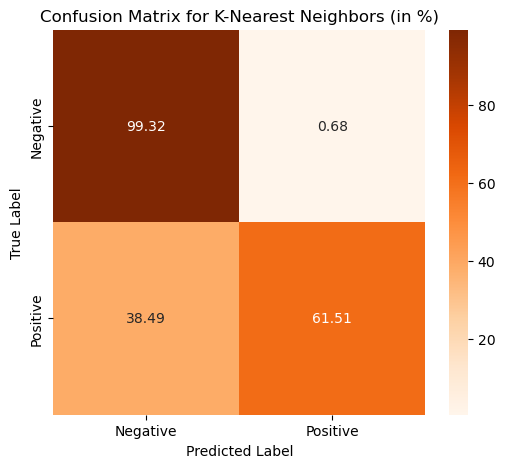

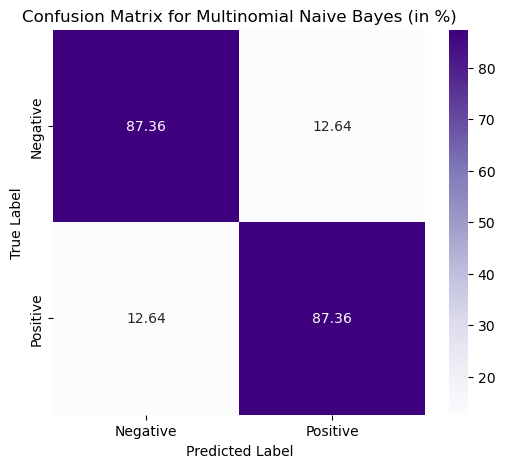

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through classifiers
for name, model in classifiers.items():
    # Latih model
    model.fit(X_train, y_train)
    # Prediksi pada data uji
    y_pred = model.predict(X_test)
    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Mengubah ke persen
    
    # Warna berbeda untuk tiap model
    cmap_choices = ['Blues', 'Greens', 'Oranges', 'Purples']
    cmap = cmap_choices[list(classifiers.keys()).index(name) % len(cmap_choices)]
    
    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap=cmap, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix for {name} (in %)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


## Hard Voting

In [35]:
# Majority Voting Ensemble
voting_clf = VotingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()], voting='hard'
)
voting_clf.fit(X_train, y_train)  # Fit ensemble pada data training
y_test_pred = voting_clf.predict(X_test)  # Prediksi pada test set

# Evaluasi ensemble model pada test set
print("\nEnsemble VotingClassifier - Test Set Evaluation")
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_test_pred))  # Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))  # Classification Report

if hasattr(voting_clf, 'predict_proba'):
    y_test_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
    print("ROC-AUC on Test Set:", roc_auc_score(y_test, y_test_pred_proba))



Ensemble VotingClassifier - Test Set Evaluation
Confusion Matrix:
[[865  21]
 [161 725]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       886
           1       0.97      0.82      0.89       886

    accuracy                           0.90      1772
   macro avg       0.91      0.90      0.90      1772
weighted avg       0.91      0.90      0.90      1772



In [36]:
# Majority Voting Ensemble
voting_clf = VotingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()], voting='hard'
)
voting_clf.fit(X_train, y_train)  # Fit ensemble pada data training
y_test_pred = voting_clf.predict(X_test)  # Prediksi pada test set

# Evaluasi ensemble model pada test set
print("\nEnsemble VotingClassifier - Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))  # Confusion Matrix

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))  # Classification Report dengan 4 digit desimal

# ROC-AUC jika classifier mendukung `predict_proba`
if hasattr(voting_clf, 'predict_proba'):
    y_test_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    print(f"ROC-AUC on Test Set: {roc_auc:.4f}")  # ROC-AUC dengan 4 desimal



Ensemble VotingClassifier - Test Set Evaluation
Confusion Matrix:
[[865  21]
 [159 727]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8447    0.9763    0.9058       886
           1     0.9719    0.8205    0.8898       886

    accuracy                         0.8984      1772
   macro avg     0.9083    0.8984    0.8978      1772
weighted avg     0.9083    0.8984    0.8978      1772



## Soft Voting

In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

# Buat model ensemble VotingClassifier dengan soft voting
voting_clf = VotingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()], voting='soft'
)

# Stratified k-Fold Cross-Validation dengan 10 fold
skf = StratifiedKFold(n_splits=10)

# Cross-validate untuk menghitung AUC-ROC pada tiap fold
roc_auc_scores = []
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit ensemble pada data training fold
    voting_clf.fit(X_train_cv, y_train_cv)
    
    # Cek apakah predict_proba tersedia
    if hasattr(voting_clf, 'predict_proba'):
        y_val_pred_proba = voting_clf.predict_proba(X_val_cv)[:, 1]
        roc_auc = roc_auc_score(y_val_cv, y_val_pred_proba)
        roc_auc_scores.append(roc_auc)
        print(f"AUC-ROC for Fold {i}: {roc_auc:.4f}")  # Tampilkan skor AUC-ROC per fold
    else:
        print(f"Fold {i}: Model tidak memiliki metode predict_proba, sehingga ROC-AUC tidak dapat dihitung.")

# Cek apakah roc_auc_scores tidak kosong sebelum menghitung rata-rata
if roc_auc_scores:
    mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
    print("\nMean ROC-AUC from Stratified K-Fold Cross-Validation:", mean_roc_auc)
else:
    print("Tidak ada skor AUC-ROC yang dihitung karena predict_proba tidak tersedia.")

# Evaluasi pada test set
y_test_pred = voting_clf.predict(X_test)  # Prediksi pada test set
print("\nEnsemble VotingClassifier - Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Hitung ROC-AUC pada test set (jika menggunakan voting dengan probabilitas)
if hasattr(voting_clf, 'predict_proba'):
    y_test_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
    print("ROC-AUC on Test Set:", roc_auc_score(y_test, y_test_pred_proba))

AUC-ROC for Fold 1: 0.9792
AUC-ROC for Fold 2: 0.9817
AUC-ROC for Fold 3: 0.9829
AUC-ROC for Fold 4: 0.9790
AUC-ROC for Fold 5: 0.9800
AUC-ROC for Fold 6: 0.9745
AUC-ROC for Fold 7: 0.9780
AUC-ROC for Fold 8: 0.9808
AUC-ROC for Fold 9: 0.9844
AUC-ROC for Fold 10: 0.9835

Mean ROC-AUC from Stratified K-Fold Cross-Validation: 0.9804067722410593

Ensemble VotingClassifier - Test Set Evaluation
Confusion Matrix:
[[868  18]
 [104 782]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       886
           1       0.98      0.88      0.93       886

    accuracy                           0.93      1772
   macro avg       0.94      0.93      0.93      1772
weighted avg       0.94      0.93      0.93      1772

ROC-AUC on Test Set: 0.985562983760427


In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

# Buat model ensemble VotingClassifier dengan soft voting
voting_clf = VotingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()], voting='soft'
)

# Stratified k-Fold Cross-Validation dengan 10 fold
skf = StratifiedKFold(n_splits=10)

# Cross-validate untuk menghitung AUC-ROC pada tiap fold
roc_auc_scores = []
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit ensemble pada data training fold
    voting_clf.fit(X_train_cv, y_train_cv)
    
    # Cek apakah predict_proba tersedia
    if hasattr(voting_clf, 'predict_proba'):
        y_val_pred_proba = voting_clf.predict_proba(X_val_cv)[:, 1]
        roc_auc = roc_auc_score(y_val_cv, y_val_pred_proba)
        roc_auc_scores.append(roc_auc)
        print(f"AUC-ROC for Fold {i}: {roc_auc:.4f}")  # Tampilkan skor AUC-ROC per fold
    else:
        print(f"Fold {i}: Model tidak memiliki metode predict_proba, sehingga ROC-AUC tidak dapat dihitung.")

# Cek apakah roc_auc_scores tidak kosong sebelum menghitung rata-rata
if roc_auc_scores:
    mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
    print(f"\nMean ROC-AUC from Stratified K-Fold Cross-Validation: {mean_roc_auc:.4f}")
else:
    print("Tidak ada skor AUC-ROC yang dihitung karena predict_proba tidak tersedia.")

# Evaluasi pada test set
y_test_pred = voting_clf.predict(X_test)  # Prediksi pada test set
print("\nEnsemble VotingClassifier - Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))  # Classification Report dengan 4 digit desimal

# Hitung ROC-AUC pada test set (jika menggunakan voting dengan probabilitas)
if hasattr(voting_clf, 'predict_proba'):
    y_test_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
    roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
    print(f"ROC-AUC on Test Set: {roc_auc_test:.4f}")  # ROC-AUC dengan 4 desimal


AUC-ROC for Fold 1: 0.9797
AUC-ROC for Fold 2: 0.9806
AUC-ROC for Fold 3: 0.9829
AUC-ROC for Fold 4: 0.9792
AUC-ROC for Fold 5: 0.9803
AUC-ROC for Fold 6: 0.9750
AUC-ROC for Fold 7: 0.9787
AUC-ROC for Fold 8: 0.9796
AUC-ROC for Fold 9: 0.9840
AUC-ROC for Fold 10: 0.9839

Mean ROC-AUC from Stratified K-Fold Cross-Validation: 0.9804

Ensemble VotingClassifier - Test Set Evaluation
Confusion Matrix:
[[867  19]
 [103 783]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8938    0.9786    0.9343       886
           1     0.9763    0.8837    0.9277       886

    accuracy                         0.9312      1772
   macro avg     0.9351    0.9312    0.9310      1772
weighted avg     0.9351    0.9312    0.9310      1772

ROC-AUC on Test Set: 0.9854


In [42]:
# Evaluasi pada test set
y_test_pred = voting_clf.predict(X_test)  # Prediksi pada test set

# Hitung jumlah prediksi sentimen positif (1) dan negatif (0)
positive_predictions = (y_test_pred == 1).sum()  # Jumlah prediksi positif
negative_predictions = (y_test_pred == 0).sum()  # Jumlah prediksi negatif

# Menampilkan jumlah prediksi untuk masing-masing sentimen
print("\nJumlah Prediksi Sentimen Positif:", positive_predictions)
print("Jumlah Prediksi Sentimen Negatif:", negative_predictions)



Jumlah Prediksi Sentimen Positif: 802
Jumlah Prediksi Sentimen Negatif: 970


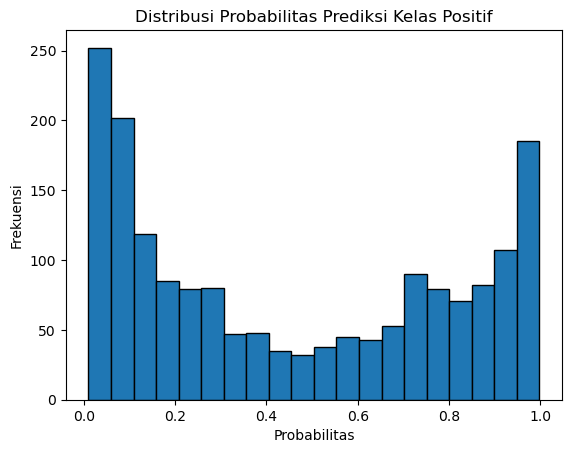

In [44]:
import matplotlib.pyplot as plt

# Visualisasi distribusi probabilitas untuk kelas positif
plt.hist(y_test_pred_proba, bins=20, edgecolor='black')
plt.title('Distribusi Probabilitas Prediksi Kelas Positif')
plt.xlabel('Probabilitas')
plt.ylabel('Frekuensi')
plt.show()


In [46]:
# Evaluasi pada test set
y_test_pred = voting_clf.predict(X_test)  # Prediksi pada test set

# Hitung jumlah prediksi sentimen positif (1) dan negatif (0)
positive_predictions = (y_test_pred == 1).sum()  # Jumlah prediksi positif
negative_predictions = (y_test_pred == 0).sum()  # Jumlah prediksi negatif

# Menampilkan jumlah prediksi untuk masing-masing sentimen
print("\nJumlah Prediksi Sentimen Positif:", positive_predictions)
print("Jumlah Prediksi Sentimen Negatif:", negative_predictions)



Jumlah Prediksi Sentimen Positif: 802
Jumlah Prediksi Sentimen Negatif: 970


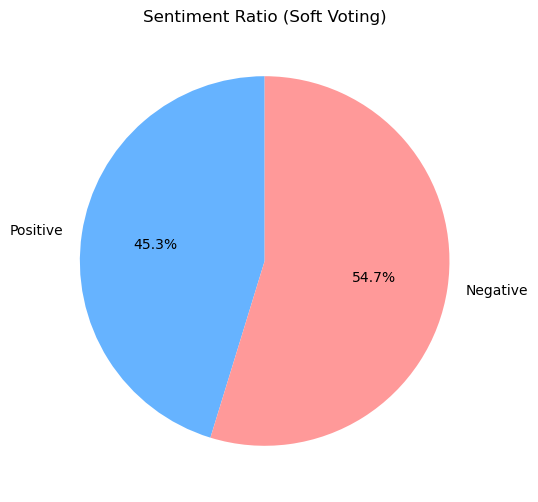

In [48]:
import matplotlib.pyplot as plt

# Data untuk visualisasi
labels = ['Positive', 'Negative']
sizes = [positive_predictions, negative_predictions]
colors = ['#66b3ff', '#ff9999']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sentiment Ratio (Soft Voting)')
plt.show()


## Weighted Voting

In [50]:
# Buat model ensemble VotingClassifier dengan weighted soft voting
voting_clf = VotingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()], 
    voting='soft', 
    weights=[2, 1, 1, 1]  # Pastikan jumlah bobot sesuai dengan jumlah estimators
)

# Stratified k-Fold Cross-Validation dengan 10 fold
skf = StratifiedKFold(n_splits=10)

# Cross-validate untuk menghitung AUC-ROC pada tiap fold
roc_auc_scores = []
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit ensemble pada data training fold
    voting_clf.fit(X_train_cv, y_train_cv)
    
    # Cek apakah predict_proba tersedia
    if hasattr(voting_clf, 'predict_proba'):
        y_val_pred_proba = voting_clf.predict_proba(X_val_cv)[:, 1]
        roc_auc = roc_auc_score(y_val_cv, y_val_pred_proba)
        roc_auc_scores.append(roc_auc)
        print(f"AUC-ROC for Fold {i}: {roc_auc:.4f}")  # Tampilkan skor AUC-ROC per fold
    else:
        print(f"Fold {i}: Model tidak memiliki metode predict_proba, sehingga ROC-AUC tidak dapat dihitung.")

# Cek apakah roc_auc_scores tidak kosong sebelum menghitung rata-rata
if roc_auc_scores:
    mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
    print("\nMean ROC-AUC from Stratified K-Fold Cross-Validation:", mean_roc_auc)
else:
    print("Tidak ada skor AUC-ROC yang dihitung karena predict_proba tidak tersedia.")

# Evaluasi pada test set
y_test_pred = voting_clf.predict(X_test)  # Prediksi pada test set
print("\nEnsemble VotingClassifier - Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Hitung ROC-AUC pada test set (jika menggunakan voting dengan probabilitas)
if hasattr(voting_clf, 'predict_proba'):
    y_test_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
    print("ROC-AUC on Test Set:", roc_auc_score(y_test, y_test_pred_proba))

AUC-ROC for Fold 1: 0.9782
AUC-ROC for Fold 2: 0.9816
AUC-ROC for Fold 3: 0.9828
AUC-ROC for Fold 4: 0.9781
AUC-ROC for Fold 5: 0.9786
AUC-ROC for Fold 6: 0.9733
AUC-ROC for Fold 7: 0.9783
AUC-ROC for Fold 8: 0.9779
AUC-ROC for Fold 9: 0.9830
AUC-ROC for Fold 10: 0.9835

Mean ROC-AUC from Stratified K-Fold Cross-Validation: 0.9795293691566581

Ensemble VotingClassifier - Test Set Evaluation
Confusion Matrix:
[[862  24]
 [ 98 788]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       886
           1       0.97      0.89      0.93       886

    accuracy                           0.93      1772
   macro avg       0.93      0.93      0.93      1772
weighted avg       0.93      0.93      0.93      1772

ROC-AUC on Test Set: 0.9847706230350219


In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

# Buat model ensemble VotingClassifier dengan weighted soft voting
voting_clf = VotingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()], 
    voting='soft', 
    weights=[2, 1, 1, 1]  # Sesuaikan bobot dengan jumlah estimators
)

# Stratified k-Fold Cross-Validation dengan 10 fold
skf = StratifiedKFold(n_splits=10)

# Cross-validate untuk menghitung AUC-ROC pada tiap fold
roc_auc_scores = []
for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit ensemble pada data training fold
    voting_clf.fit(X_train_cv, y_train_cv)
    
    # Cek apakah predict_proba tersedia
    if hasattr(voting_clf, 'predict_proba'):
        y_val_pred_proba = voting_clf.predict_proba(X_val_cv)[:, 1]
        roc_auc = roc_auc_score(y_val_cv, y_val_pred_proba)
        roc_auc_scores.append(roc_auc)
        print(f"AUC-ROC for Fold {i}: {roc_auc:.4f}")  # Tampilkan skor AUC-ROC per fold
    else:
        print(f"Fold {i}: Model tidak memiliki metode predict_proba, sehingga ROC-AUC tidak dapat dihitung.")

# Cek apakah roc_auc_scores tidak kosong sebelum menghitung rata-rata
if roc_auc_scores:
    mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
    print(f"\nMean ROC-AUC from Stratified K-Fold Cross-Validation: {mean_roc_auc:.4f}")
else:
    print("Tidak ada skor AUC-ROC yang dihitung karena predict_proba tidak tersedia.")

# Evaluasi pada test set
y_test_pred = voting_clf.predict(X_test)  # Prediksi pada test set
print("\nEnsemble VotingClassifier - Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))  # Classification Report dengan presisi 4 desimal

# Hitung ROC-AUC pada test set (jika menggunakan voting dengan probabilitas)
if hasattr(voting_clf, 'predict_proba'):
    y_test_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
    roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)
    print(f"ROC-AUC on Test Set: {roc_auc_test:.4f}")  # ROC-AUC dengan presisi 4 desimal


AUC-ROC for Fold 1: 0.9790
AUC-ROC for Fold 2: 0.9812
AUC-ROC for Fold 3: 0.9824
AUC-ROC for Fold 4: 0.9781
AUC-ROC for Fold 5: 0.9785
AUC-ROC for Fold 6: 0.9731
AUC-ROC for Fold 7: 0.9781
AUC-ROC for Fold 8: 0.9790
AUC-ROC for Fold 9: 0.9829
AUC-ROC for Fold 10: 0.9834

Mean ROC-AUC from Stratified K-Fold Cross-Validation: 0.9796

Ensemble VotingClassifier - Test Set Evaluation
Confusion Matrix:
[[862  24]
 [101 785]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8951    0.9729    0.9324       886
           1     0.9703    0.8860    0.9263       886

    accuracy                         0.9295      1772
   macro avg     0.9327    0.9295    0.9293      1772
weighted avg     0.9327    0.9295    0.9293      1772

ROC-AUC on Test Set: 0.9849


C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\1229010490.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  disp.plot(ax=axes[idx], cmap=plt.cm.get_cmap(cmap), text_kw={'fontsize': 20})  # Atur ukuran font angka
C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\1229010490.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  disp.plot(ax=axes[idx], cmap=plt.cm.get_cmap(cmap), text_kw={'fontsize': 20})  # Atur ukuran font angka
C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\1229010490.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[na

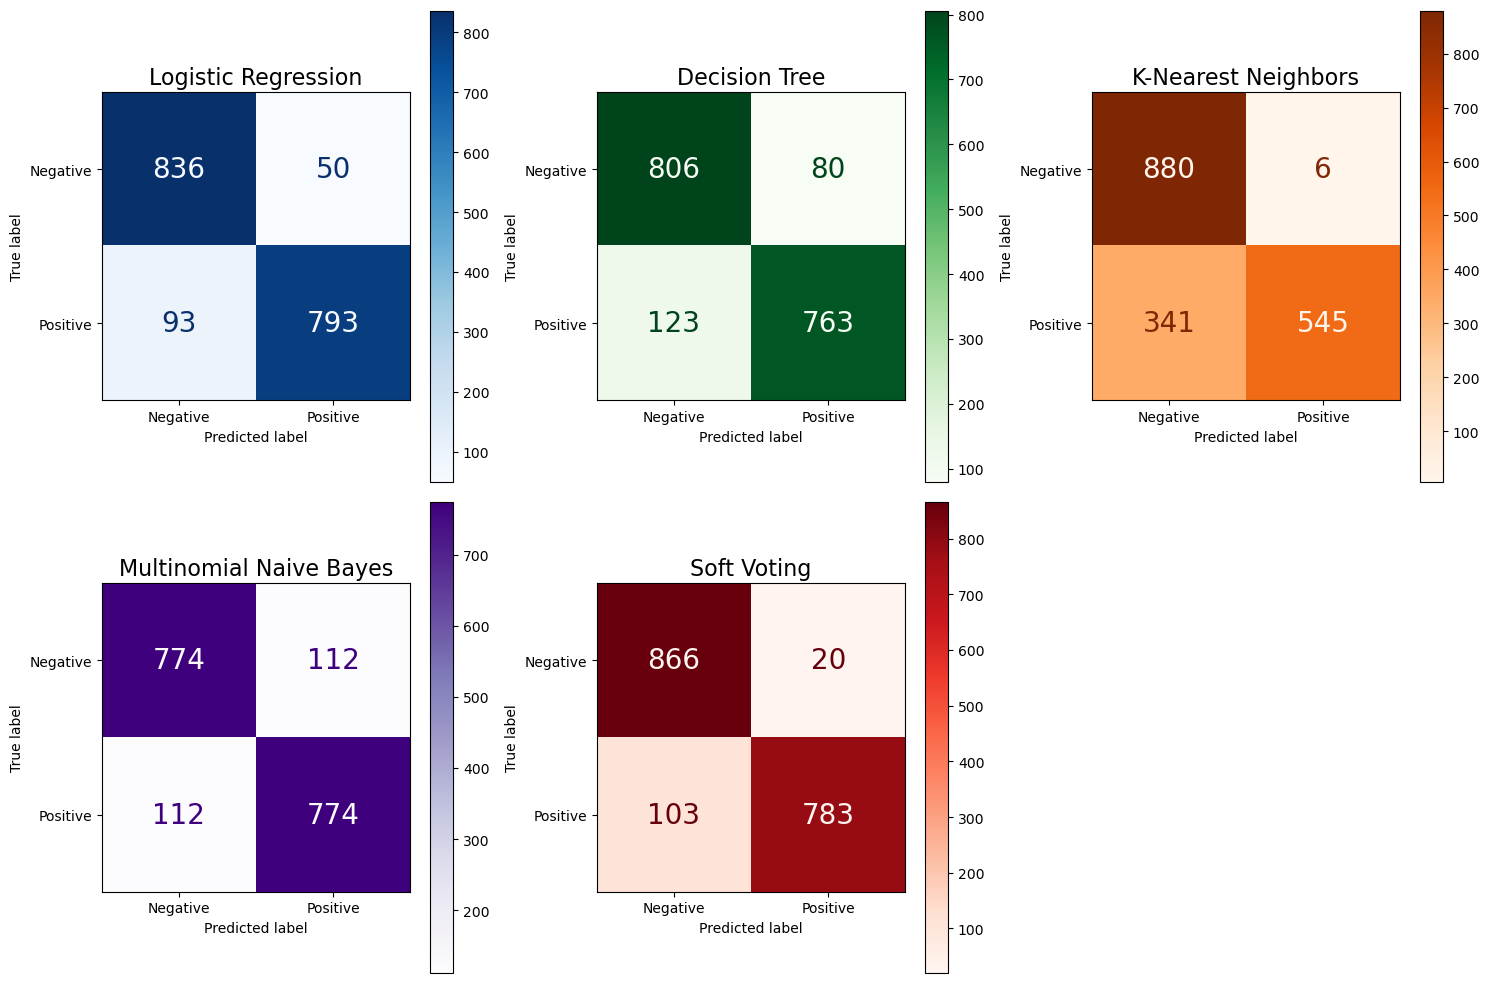

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Dictionary untuk menyimpan confusion matrix
confusion_matrices = {}

# Loop untuk setiap classifier
for name, model in classifiers.items():
    # Latih model
    model.fit(X_train, y_train)
    # Prediksi pada data uji
    y_pred = model.predict(X_test)
    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    confusion_matrices[name] = cm

# Tambahkan confusion matrix untuk soft voting
voting_clf = VotingClassifier(estimators=list(classifiers.items()), voting='soft')
voting_clf.fit(X_train, y_train)
soft_voting_pred = voting_clf.predict(X_test)
confusion_matrices['Soft Voting'] = confusion_matrix(y_test, soft_voting_pred, labels=[0, 1])

# Hitung jumlah kolom yang diperlukan
n_classifiers = len(confusion_matrices)
n_cols = (n_classifiers + 1) // 2  # 2 baris
n_rows = 2

# Setup grid untuk visualisasi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 10))  # Atur ukuran subplot
axes = axes.flatten()  # Ubah menjadi array 1D untuk indexing yang mudah

# Warna berbeda untuk tiap model
cmap_choices = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds']

# Plot confusion matrix
for idx, (name, cm) in enumerate(confusion_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    cmap = cmap_choices[idx % len(cmap_choices)]  # Pilih warna berdasarkan indeks
    disp.plot(ax=axes[idx], cmap=plt.cm.get_cmap(cmap), text_kw={'fontsize': 20})  # Atur ukuran font angka
    axes[idx].set_title(f"{name}", fontsize=16)  # Perbesar ukuran judul

# Hapus subplot kosong jika jumlah classifier kurang dari grid
for i in range(n_classifiers, len(axes)):
    fig.delaxes(axes[i])

# Sesuaikan tata letak
plt.tight_layout()
plt.show()



C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\527301917.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  disp.plot(ax=axes[idx], cmap=plt.cm.get_cmap(cmap), text_kw={'fontsize': 20})  # Atur ukuran font angka
C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\527301917.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  disp.plot(ax=axes[idx], cmap=plt.cm.get_cmap(cmap), text_kw={'fontsize': 20})  # Atur ukuran font angka
C:\Users\hanif\AppData\Local\Temp\ipykernel_8612\527301917.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]

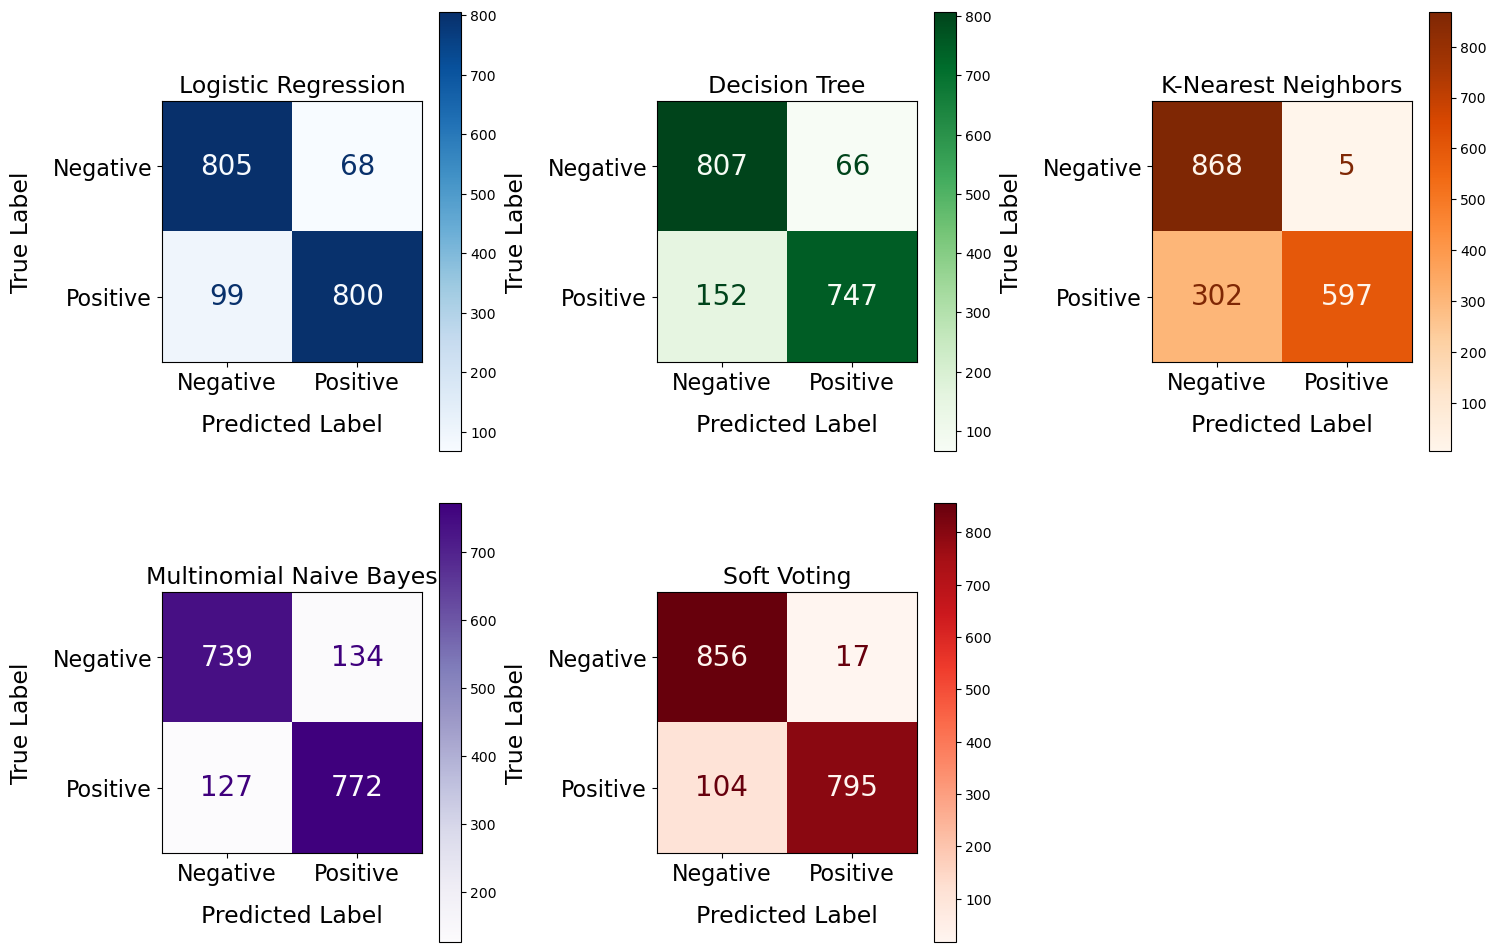

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Dictionary untuk menyimpan confusion matrix
confusion_matrices = {}

# Loop untuk setiap classifier
for name, model in classifiers.items():
    # Latih model
    model.fit(X_train, y_train)
    # Prediksi pada data uji
    y_pred = model.predict(X_test)
    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    confusion_matrices[name] = cm

# Tambahkan confusion matrix untuk soft voting
voting_clf = VotingClassifier(estimators=list(classifiers.items()), voting='soft')
voting_clf.fit(X_train, y_train)
soft_voting_pred = voting_clf.predict(X_test)
confusion_matrices['Soft Voting'] = confusion_matrix(y_test, soft_voting_pred, labels=[0, 1])

# Hitung jumlah kolom yang diperlukan
n_classifiers = len(confusion_matrices)
n_cols = (n_classifiers + 1) // 2  # 2 baris
n_rows = 2

# Setup grid untuk visualisasi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 10))  # Atur ukuran subplot
axes = axes.flatten()  # Ubah menjadi array 1D untuk indexing yang mudah

# Warna berbeda untuk tiap model
cmap_choices = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds']

# Plot confusion matrix
for idx, (name, cm) in enumerate(confusion_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    cmap = cmap_choices[idx % len(cmap_choices)]  # Pilih warna berdasarkan indeks
    disp.plot(ax=axes[idx], cmap=plt.cm.get_cmap(cmap), text_kw={'fontsize': 20})  # Atur ukuran font angka
    axes[idx].set_title(f"{name}", fontsize=17)  # Perbesar ukuran judul
    axes[idx].set_xlabel("Predicted Label", fontsize=17, labelpad=14)  # Perbesar label sumbu x dan beri jarak
    axes[idx].set_ylabel("True Label", fontsize=17, labelpad=14)  # Perbesar label sumbu y dan beri jarak

    # Perbesar font untuk label kategori "Negative" dan "Positive" pada sumbu x dan y
    axes[idx].tick_params(axis='x', labelsize=16)  # Sumbu X
    axes[idx].tick_params(axis='y', labelsize=16)  # Sumbu Y

# Hapus subplot kosong jika jumlah classifier kurang dari grid
for i in range(n_classifiers, len(axes)):
    fig.delaxes(axes[i])

# Sesuaikan tata letak
plt.tight_layout()
plt.show()




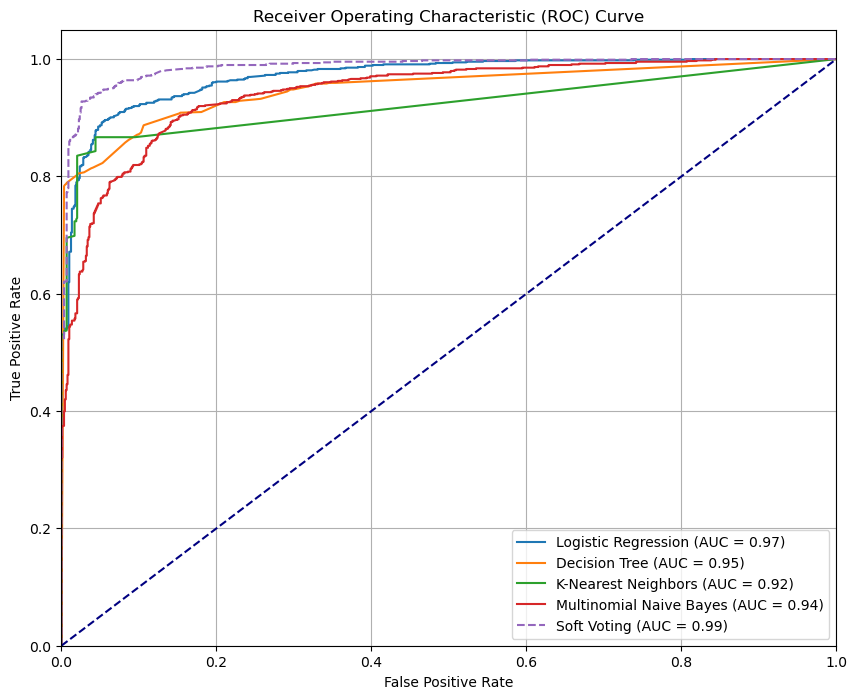

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Setup plot
plt.figure(figsize=(10, 8))

# Hitung dan tampilkan ROC curve untuk setiap model
for name, clf in classifiers.items():
    # Latih model dan prediksi probabilitas
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Ambil probabilitas untuk kelas positif

    # Hitung ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# ROC curve untuk Soft Voting
voting_clf = VotingClassifier(estimators=list(classifiers.items()), voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_prob_voting = voting_clf.predict_proba(X_test)[:, 1]
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_pred_prob_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)
plt.plot(fpr_voting, tpr_voting, label=f'Soft Voting (AUC = {roc_auc_voting:.2f})', linestyle='--')

# Format plot
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Line acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Tampilkan plot
plt.show()


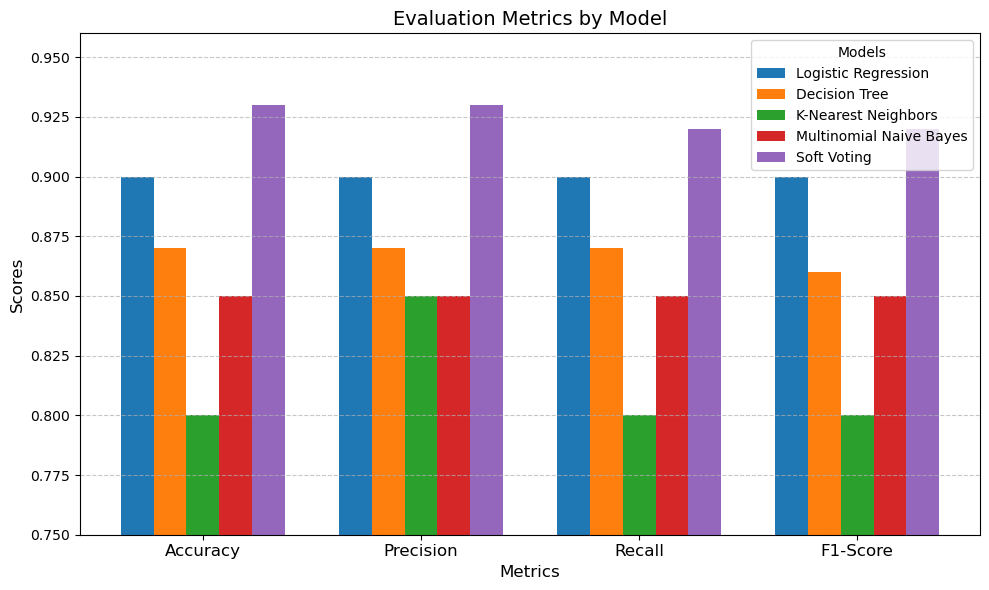

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Data evaluasi
metrics = ['Accuracy','Precision', 'Recall', 'F1-Score']
models = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 
          'Multinomial Naive Bayes', 'Soft Voting']
accuracy_scores = [0.90, 0.87, 0.80, 0.85, 0.93]
precision_scores = [0.90, 0.87, 0.85, 0.85, 0.93]
recall_scores = [0.90, 0.87, 0.80, 0.85, 0.92]
f1_scores = [0.90, 0.86, 0.80, 0.85, 0.92]

# Gabungkan skor ke dalam array
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

# Konfigurasi bar chart
bar_width = 0.15
x = np.arange(len(metrics))  # Indeks untuk metrik

# Membuat grafik
fig, ax = plt.subplots(figsize=(10, 6))

# Tambahkan bar untuk setiap model
for i, model in enumerate(models):
    ax.bar(x + i * bar_width, [scores[j][i] for j in range(len(metrics))], 
           bar_width, label=model)

# Konfigurasi sumbu dan judul
ax.set_xticks(x + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0.75, 0.96)  # Rentang Y untuk menyoroti perbedaan kecil
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Evaluation Metrics by Model', fontsize=14)
ax.legend(title='Models', fontsize=10, loc='upper right')

# Tambahkan grid untuk visualisasi yang lebih baik
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix

# Pisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Latih masing-masing base classifier dan Voting Classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)
    log_loss_value = log_loss(y_test, y_pred_prob)  # Menghitung Log Loss untuk model ini
    print(f"Log Loss - {name}: {log_loss_value}")

# Latih Voting Classifier
voting_clf.fit(X_train, y_train)
y_pred_prob_voting = voting_clf.predict_proba(X_test)
log_loss_voting = log_loss(y_test, y_pred_prob_voting)  # Log Loss untuk Voting Classifier
print(f"Log Loss - Voting Classifier: {log_loss_voting}")

# Evaluasi klasifikasi untuk Voting Classifier
y_pred = voting_clf.predict(X_test)
print("\nClassification Report - Voting Classifier:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix - Voting Classifier:")
print(confusion_matrix(y_test, y_pred))


Log Loss - Logistic Regression: 0.2405788664565317
Log Loss - Decision Tree: 1.5260940674497816
Log Loss - K-Nearest Neighbors: 1.409257178951484
Log Loss - Multinomial Naive Bayes: 0.39975688878808646
Log Loss - Voting Classifier: 0.24863228997775474

Classification Report - Voting Classifier:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       873
           1       0.98      0.88      0.93       899

    accuracy                           0.93      1772
   macro avg       0.93      0.93      0.93      1772
weighted avg       0.93      0.93      0.93      1772


Confusion Matrix - Voting Classifier:
[[855  18]
 [106 793]]


In [56]:
import time
# Menghitung running time untuk setiap base classifier dan voting classifier
for name, clf in classifiers.items():
    start_time = time.time()  # Waktu mulai
    clf.fit(X_train, y_train)  # Latih model
    end_time = time.time()  # Waktu selesai
    training_time = end_time - start_time  # Hitung durasi waktu pelatihan
    y_pred = clf.predict(X_test)  # Prediksi pada data uji
    print(f"Training Time - {name}: {training_time:.4f} detik")

# Menghitung running time untuk Voting Classifier
start_time = time.time()
voting_clf.fit(X_train, y_train)  # Latih Voting Classifier
end_time = time.time()
training_time_voting = end_time - start_time  # Waktu pelatihan Voting Classifier
y_pred_voting = voting_clf.predict(X_test)  # Prediksi dengan Voting Classifier
print(f"\nTraining Time - Voting Classifier: {training_time_voting:.4f} detik")

# Evaluasi klasifikasi untuk Voting Classifier
print("\nClassification Report - Voting Classifier:")
print(classification_report(y_test, y_pred_voting))

print("\nConfusion Matrix - Voting Classifier:")
print(confusion_matrix(y_test, y_pred_voting))

Training Time - Logistic Regression: 0.6525 detik
Training Time - Decision Tree: 2.9502 detik
Training Time - K-Nearest Neighbors: 0.0547 detik
Training Time - Multinomial Naive Bayes: 0.0354 detik

Training Time - Voting Classifier: 3.8595 detik

Classification Report - Voting Classifier:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       873
           1       0.98      0.89      0.93       899

    accuracy                           0.93      1772
   macro avg       0.94      0.93      0.93      1772
weighted avg       0.94      0.93      0.93      1772


Confusion Matrix - Voting Classifier:
[[855  18]
 [102 797]]
